In [1]:
from trainer import SSMTrainer
import torch as T

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=15,
    reward_target=475,
    lr=2e-4,
    gamma=0.95,
    entropy_coefficient=0.02,
    validation_length=100,
    max_episode_time=500,
    strict_mode=True,
    dir='cartpole_ssm_only',
    device=device
    )

In [2]:
ssm_trainer.train()

Episode 1: Reward = 12.0
Episode 2: Reward = 41.0 | Validation Avg = 10.00 from 1 episodes 
Episode 3: Reward = 21.0 | Validation Avg = 10.00 from 1 episodes 
Episode 4: Reward = 48.0 | Validation Avg = 9.00 from 1 episodes 
Episode 5: Reward = 35.0 | Validation Avg = 9.00 from 1 episodes 
Episode 6: Reward = 14.0
Episode 7: Reward = 25.0 | Validation Avg = 11.00 from 1 episodes 
Episode 8: Reward = 32.0 | Validation Avg = 10.00 from 1 episodes 
Episode 9: Reward = 27.0 | Validation Avg = 12.00 from 1 episodes 
Episode 10: Reward = 18.0 | Validation Avg = 12.00 from 1 episodes 
Episode 11: Reward = 17.0 | Validation Avg = 16.00 from 1 episodes 
Episode 12: Reward = 21.0 | Validation Avg = 17.00 from 1 episodes 
Episode 13: Reward = 49.0 | Validation Avg = 30.00 from 1 episodes 
Episode 14: Reward = 84.0 | Validation Avg = 19.00 from 1 episodes 
Episode 15: Reward = 11.0
Episode 16: Reward = 11.0
Episode 17: Reward = 12.0
Episode 18: Reward = 25.0 | Validation Avg = 16.00 from 1 episode

In [3]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 500.0


In [4]:
df = ssm_trainer.compile_data()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,recurrent_block.state_prediction.0.bias,recurrent_block.state_prediction.1.weight,recurrent_block.state_prediction.1.bias,recurrent_block.state_prediction.3.weight,recurrent_block.state_prediction.3.bias,training_steps,training_reward,validation_reward,loss,validation_episodes
0,1.431855e-06,0.000024,0.000090,0.000049,0.055515,0.012836,0.142735,0.000213,1.048370e-05,2.365248e-06,...,0.209192,0.025223,0.024874,0.214928,0.063927,12,12.0,12.0,-0.166139,0
1,2.810457e-07,0.000004,0.000006,0.000003,0.011582,0.000687,0.022582,0.000048,5.554501e-07,7.658344e-08,...,0.224607,0.031531,0.028051,0.230250,0.068630,53,41.0,10.0,-0.049871,1
2,1.704842e-07,0.000003,0.000006,0.000003,0.012665,0.000914,0.013518,0.000091,1.814313e-06,5.182537e-07,...,0.226392,0.030752,0.027782,0.229140,0.068449,74,21.0,10.0,-0.555882,1
3,5.230087e-06,0.000078,0.000075,0.000041,0.072399,0.003779,0.008821,0.000080,1.083292e-05,5.922531e-06,...,0.225916,0.031197,0.027884,0.227503,0.068419,122,48.0,9.0,0.075467,1
4,1.956795e-07,0.000003,0.000005,0.000003,0.010209,0.000646,0.014182,0.000091,6.496377e-07,5.179768e-08,...,0.223183,0.030792,0.026993,0.223614,0.066276,157,35.0,9.0,-1.042367,1


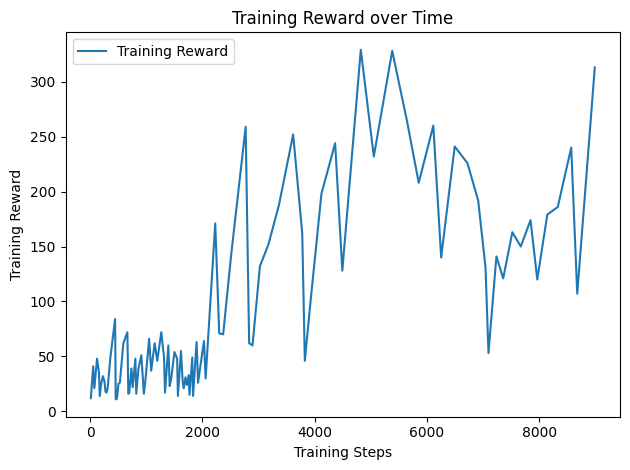

In [6]:
plt.plot(df['training_steps'], df['training_reward'], label='Training Reward', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Training Reward')
plt.title('Training Reward over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

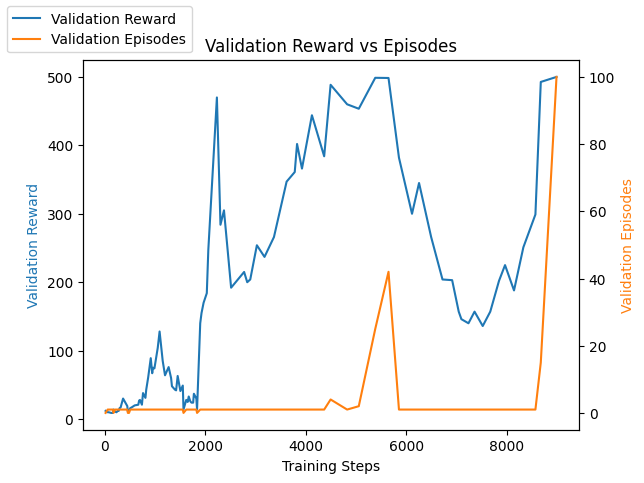

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['training_steps'], df['validation_reward'], label='Validation Reward', color='tab:blue')
ax2.plot(df['training_steps'], df['validation_episodes'], label='Validation Episodes', color='tab:orange')

ax1.set_xlabel('Training Steps')
ax1.set_ylabel('Validation Reward', color='tab:blue')
ax2.set_ylabel('Validation Episodes', color='tab:orange')

fig.legend(loc='upper left')
plt.title('Validation Reward vs Episodes')
plt.show()


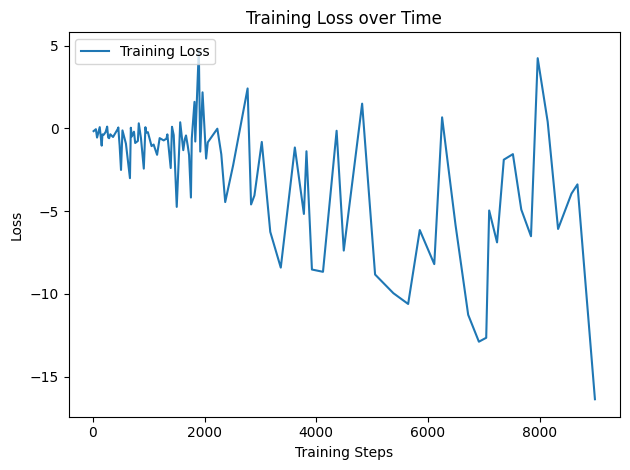

In [8]:
plt.plot(df['training_steps'], df['loss'], label='Training Loss', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

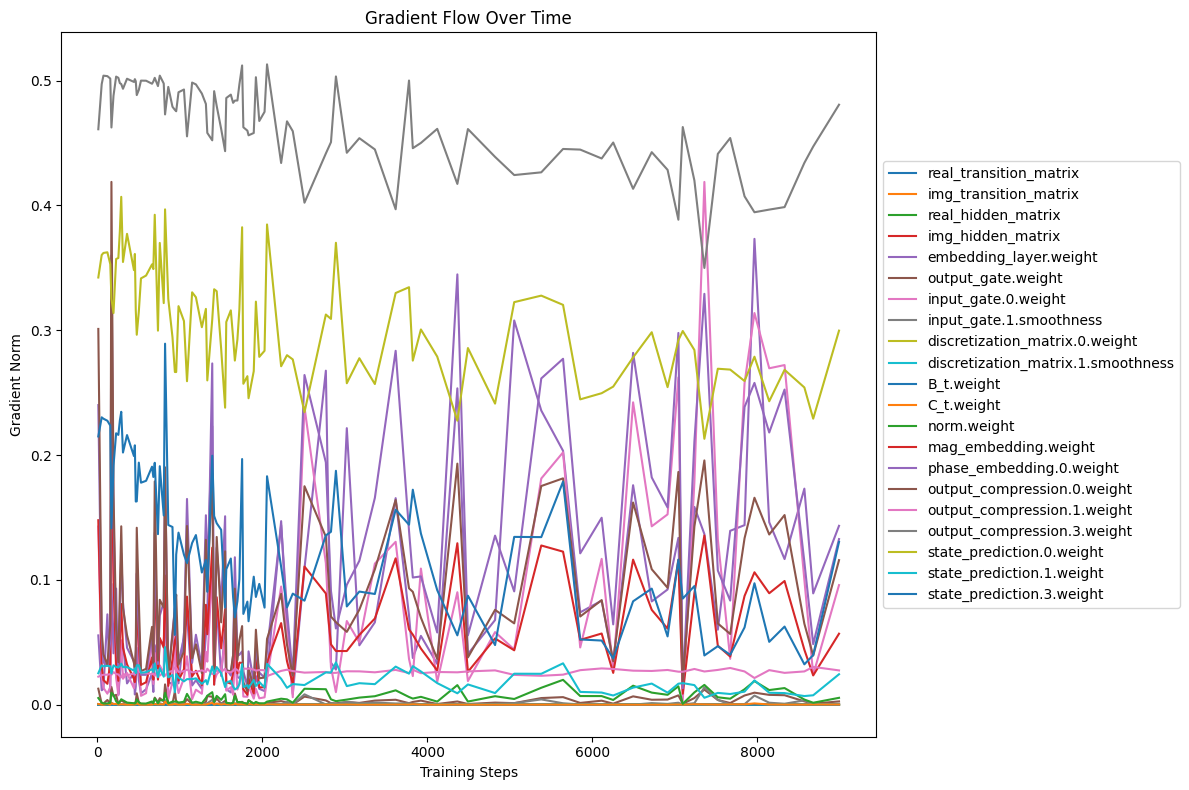

In [9]:
plt.figure(figsize=(12, 8))  # Wider plot for clarity

for gradient in ssm_trainer.gradient_data.keys():
    if 'bias' not in gradient:
        plt.plot(df['training_steps'], df[gradient], label=gradient.removeprefix('recurrent_block.'))

plt.xlabel('Training Steps')
plt.ylabel('Gradient Norm')
plt.title('Gradient Flow Over Time')

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [10]:
df['training_steps']

0       12
1       53
2       74
3      122
4      157
      ... 
94    8144
95    8330
96    8570
97    8677
98    8990
Name: training_steps, Length: 99, dtype: int64